# Importing the necessary libraries

In [14]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
import matplotlib.pyplot as plt

In [15]:
from scipy.stats import mannwhitneyu as mw

# setting up important variables

In [16]:
# energy;concrete;resid_build_sale_price --> ;toxicity --> D;instanbul--> D; ppb --> D

In [17]:
dataset = "concrete"

In [18]:
def get_best_params(dataset):
    
    # reading the dataset
    df = pd.read_csv(f"gridlog/{dataset}_grid_search.csv").drop(columns = "Unnamed: 0")
    
    # getting the names of the columns with the test rmse and size for each split
    test_rmse_colnames = [col for col in df.columns if re.match("split[0-9]_test_rmse", col)]
    test_size_colnames = [col.replace("rmse", "size") for col in test_rmse_colnames]

    # calculating the median test rmse for each parameter combination
    df["median_test_rmse"] = df.apply(lambda x: np.abs(np.median([x[cn] for cn in test_rmse_colnames])), axis = 1)

    # calculating the median test size for each parameter combination
    df["median_test_size"] = df.apply(lambda x: np.abs(np.median([x[cn] for cn in test_size_colnames])), axis = 1)
    
    # obtaining the best parameter set based on rmse
    best_rmse = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_rmse").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_rmse").iloc[0]["params"]))

    # obtaining the best parameter set based on size
    best_size = eval(re.sub("<(?:.+)>", df.sort_values(by = "median_test_size").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_size").iloc[0]["params"]))
    
    ########
    
    # INVALIDITY
    
    ########
    # discarding invalid combinations
    
    
    i = 1
    
    invalids = [["mul", False, True], ["sum", False, True]]
    
    while [best_rmse["operator"], best_rmse["sig"], best_rmse["two_trees"]] in invalids:
        best_rmse = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_rmse").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_rmse").iloc[i]["params"]))
        
        i += 1
        
    i = 1
    
    while [best_size["operator"], best_size["sig"], best_size["two_trees"]] in invalids:
        best_size = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_size").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_size").iloc[i]["params"]))
        
        i += 1
        
    
    return best_rmse, best_size, df

In [19]:
def find_first_significance(df, by_size=False):
    
    """
    
    No longer used since we will just present top 10 results
    
    """
    if by_size:
        for i in range(len(df)):
            if mw(df.sort_values(by = "median_test_size").iloc[0][size_cols].values.tolist(), 
                       df.sort_values(by = "median_test_size").iloc[i][size_cols].values.tolist())[-1] <= 0.05:
                return i
        return None
    else:
        for i in range(len(df)):
            if mw(df.sort_values(by = "median_test_rmse").iloc[0][rmse_cols].values.tolist(), 
                       df.sort_values(by = "median_test_rmse").iloc[i][rmse_cols].values.tolist())[-1] <= 0.05:
                return i
        return None

# analyzing the results

Single

In [20]:
dataset = "concrete"

In [26]:
rmse, size, df = get_best_params(dataset=dataset)

test_rmse_colnames = [col for col in df.columns if re.match("split[0-9]_test_rmse", col)]
test_rmse_colnames

['split0_test_rmse',
 'split1_test_rmse',
 'split2_test_rmse',
 'split3_test_rmse',
 'split4_test_rmse']

In [27]:
[col.replace("rmse", "size") for col in test_rmse_colnames]

['split0_test_size',
 'split1_test_size',
 'split2_test_size',
 'split3_test_size',
 'split4_test_size']

Multiple

In [30]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_parent,param_max_depth,param_ms,param_operator,param_p_inflate,param_sig,...,split0_test_size,split1_test_size,split2_test_size,split3_test_size,split4_test_size,mean_test_size,std_test_size,rank_test_size,median_test_rmse,median_test_size
0,17.886454,0.713931,0.008999,0.002082,True,NaN,"(0, 0.01)",mul,0.1,False,...,-738.0,-534.0,-554.0,-537.0,-897.0,-652.0,144.342648,747,34.608093,554.0
1,53.017137,2.020076,0.049781,0.011252,True,NaN,"(0, 0.01)",mul,0.3,False,...,-2768.0,-2338.0,-3001.0,-2718.0,-2712.0,-2707.4,212.820676,1119,35.098480,2718.0
2,83.009459,2.076056,0.073684,0.006190,True,NaN,"(0, 0.01)",mul,0.5,False,...,-4402.0,-4697.0,-4715.0,-3880.0,-4211.0,-4381.0,313.609311,1152,34.611774,4402.0
3,113.736959,2.590327,0.116411,0.012388,True,NaN,"(0, 0.01)",mul,0.7,False,...,-6918.0,-5788.0,-6810.0,-6583.0,-6343.0,-6488.4,402.152508,1186,34.356186,6583.0
4,137.668831,1.448759,0.128076,0.013657,True,NaN,"(0, 0.01)",mul,0.9,False,...,-7879.0,-7734.0,-8490.0,-7780.0,-7815.0,-7939.6,279.242260,1199,34.089787,7815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,39.990024,3.463794,0.008577,0.002999,False,100.0,"(0, 10)",sum,0.5,False,...,-385.0,-201.0,-341.0,-331.0,-403.0,-332.2,70.841796,578,7.794052,341.0
1196,58.548503,2.158602,0.017795,0.003473,False,100.0,"(0, 10)",sum,0.7,True,...,-1374.0,-1194.0,-1365.0,-1048.0,-1308.0,-1257.8,122.964060,959,8.145095,1308.0
1197,54.857380,1.805376,0.018152,0.008472,False,100.0,"(0, 10)",sum,0.7,False,...,-513.0,-583.0,-613.0,-457.0,-549.0,-543.0,54.464667,667,8.184869,549.0
1198,63.459479,0.611161,0.020362,0.003254,False,100.0,"(0, 10)",sum,0.9,True,...,-1335.0,-1410.0,-1407.0,-1276.0,-1293.0,-1344.2,55.912074,988,8.678095,1335.0


In [10]:
# energy;concrete;resid_build_sale_price --> ;toxicity --> D;instanbul--> D; ppb --> D

datasets = ["energy", "concrete", "resid_build_sale_price","toxicity","instanbul", "ppb"]

sizes = []
rmseses = []

# dataset = "ppb"

for data in datasets:
    rmse, size, df = get_best_params(dataset=data)
    
    s = pd.DataFrame(size)
    s['winning_by'] = s['copy_parent'].map(lambda x: "size")
    sizes.append(s)
    
    r = pd.DataFrame(rmse)
    r['winning_by'] = r['copy_parent'].map(lambda x: "rmse")
    
    rmseses.append(r)

df = pd.concat(sizes + rmseses, axis=0)

df

,copy_parent,max_depth,ms,operator,p_inflate,sig,two_trees,winning_by
0,True,100,0,mul,0.1,True,False,size
1,True,100,3,mul,0.1,True,False,size
0,True,None,0,mul,0.1,True,False,size
1,True,None,10,mul,0.1,True,False,size
0,True,100,0,mul,0.1,True,False,size
1,True,100,10,mul,0.1,True,False,size
0,False,50,0,mul,0.1,True,False,size
1,False,50,10,mul,0.1,True,False,size
0,True,100,0,sum,0.1,False,False,size
1,True,100,10,sum,0.1,False,False,size


# Visualizations

## copy_parent

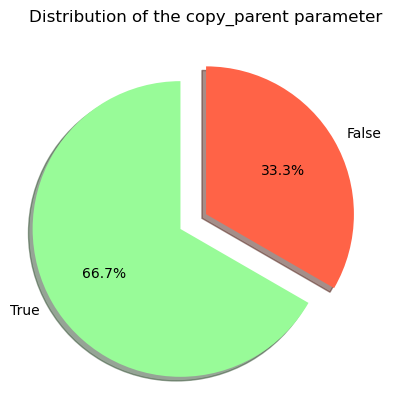

In [11]:
plt.pie([len(df[df.copy_parent]),df.shape[0]-len(df[df.copy_parent])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors=["palegreen","tomato"])
plt.title("Distribution of the copy_parent parameter")
plt.show()


## Two trees

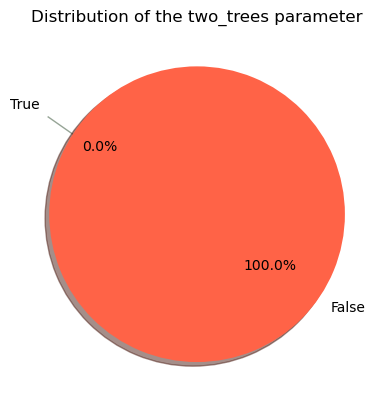

In [12]:
plt.pie([len(df[df.two_trees]),df.shape[0]-len(df[df.two_trees])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=145,explode = (0.2,0.0),colors=["palegreen","tomato"])
plt.title("Distribution of the two_trees parameter")
plt.show()

# Sig

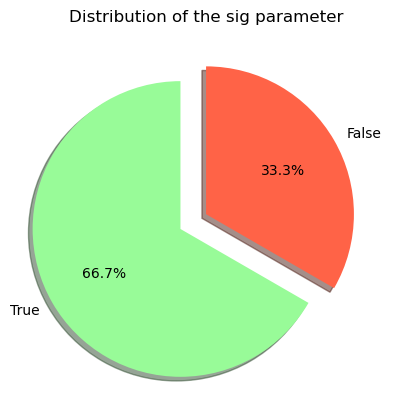

In [13]:
plt.pie([len(df[df.sig]),df.shape[0]-len(df[df.sig])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors=["palegreen","tomato"])
plt.title("Distribution of the sig parameter")
plt.show()

## Overview

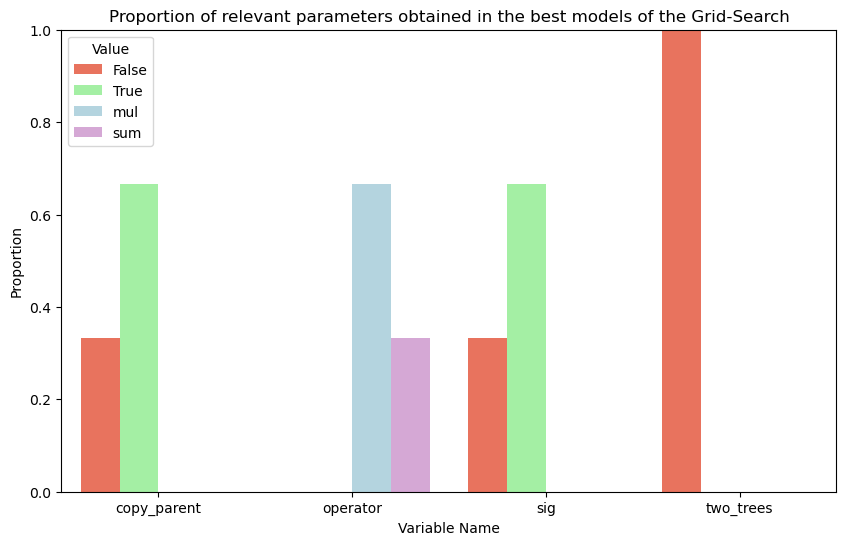

In [32]:
# ensuring value column is converted to string
proportion_data['Value'] = proportion_data['Value'].astype(str)

# defining a custom color palette
custom_palette = {
    'True': 'palegreen',
    'False': 'tomato',
    'mul': 'lightblue',
    'sum': 'plum'
}

# plotting with the custom color palette
plt.figure(figsize=(10, 6))
sb.barplot(data=proportion_data, x='Variable', y='Proportion', hue='Value', palette=custom_palette)
plt.title('Proportion of relevant parameters obtained in the best models of the Grid-Search')
plt.xlabel('Variable Name')
plt.ylabel('Proportion')
plt.legend(title='Value')
plt.ylim(0, 1)  # ensures y-axis is from 0 to 1 for proportions
plt.show()


## Size vs. RMSE

### copy parent

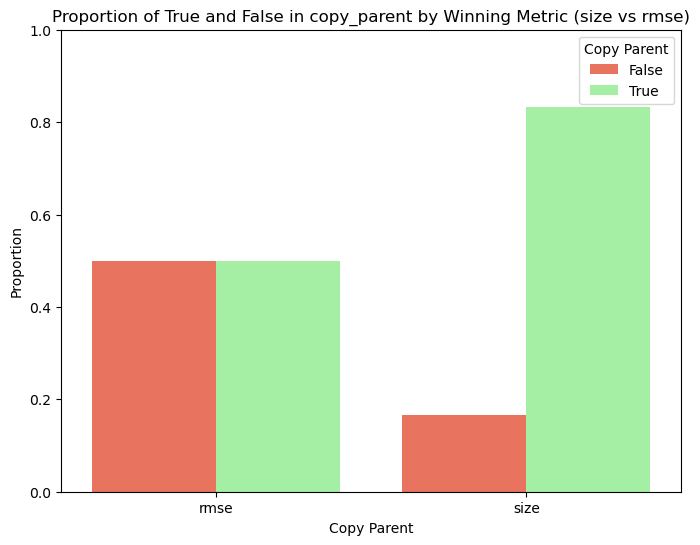

In [42]:
df['copy_parent'] = df['copy_parent'].astype(str) 

count_df = df.groupby(['winning_by', 'copy_parent']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='copy_parent', palette=custom_palette)
plt.title('Proportion of True and False in copy_parent by Winning Metric (size vs rmse)')
plt.xlabel('Copy Parent')
plt.ylabel('Proportion')
plt.legend(title='Copy Parent')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()


### two trees

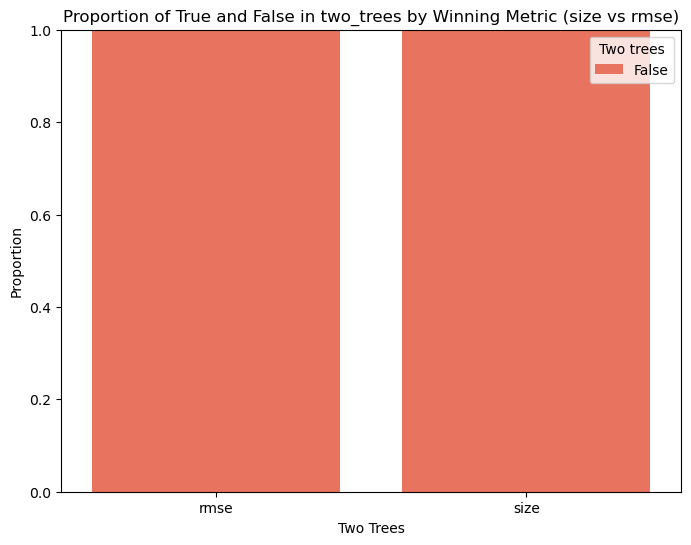

In [44]:
df['two_trees'] = df['two_trees'].astype(str) 

count_df = df.groupby(['winning_by', 'two_trees']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='two_trees', palette=custom_palette)
plt.title('Proportion of True and False in two_trees by Winning Metric (size vs rmse)')
plt.xlabel('Two Trees')
plt.ylabel('Proportion')
plt.legend(title='Two trees')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()


### sig

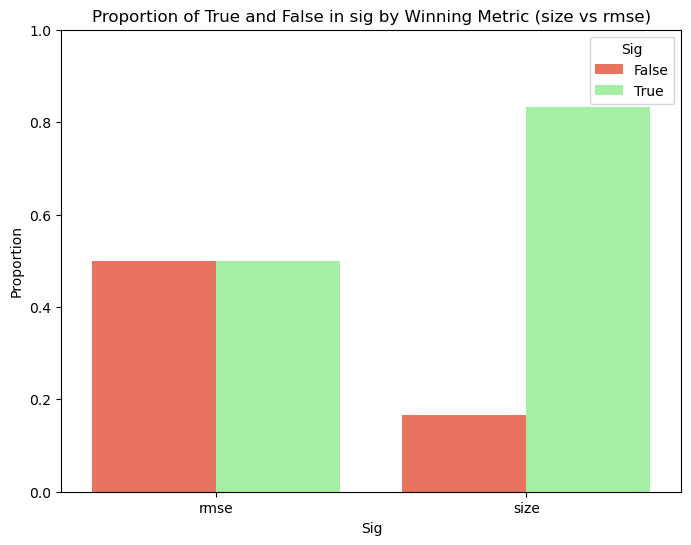

In [45]:
df['sig'] = df['sig'].astype(str) 

count_df = df.groupby(['winning_by', 'sig']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='sig', palette=custom_palette)
plt.title('Proportion of True and False in sig by Winning Metric (size vs rmse)')
plt.xlabel('Sig')
plt.ylabel('Proportion')
plt.legend(title='Sig')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()

Notes and extras

In [14]:
size_cols = [col for col in df.columns if "split" in col and "rmse" not in col]
rmse_cols = [col for col in df.columns if "split" in col and "rmse" in col]

In [15]:
rmse


{'copy_parent': True,
 'max_depth': 50,
 'ms': (0, 3),
 'operator': 'sum',
 'p_inflate': 0.5,
 'sig': False,
 'two_trees': False}